# Chapter 2. Data and Sampling Distributions

## Random Sampling and Sample Bias

Sample = a subset of data from the population (a larger data set)

Random Sampling = a process in which each available member of the population being sampled has an equal chance of being chosen for the sample at each draw. The sample that results is called a *simple random sample*. Sampling can be done with *replacement*, in which observations are put back in the population after each draw for possible future reselection. Or it can be done without replacement, in which case observations, once selected, are unavailable for future draws.

Example: We want to create a representative profile of customers and we need to conduct a pilot customer survey. The survey needs to be representative, but is labor intensive. 
1. First we need to define who a customer is. We might select all customers who purchased from us. Should we include all past customers? Do we include refunds? Internal test purchases? Resellers? Both billing agent and customer?
2. Specify a sampling procedure, such as "Select 100 customers at random". Things to consider in this scenario: where a sampling from a flow is involved (e.g., real-time customer transactions or web visitors), timing considerations (e.g., a web visitor at 10 am on a weekday vs. a web visitor at 10 pm on a weekend.)


Data quality > data quantity when making an estimate or a model based on a sample. Data quality in data science is the completeness, consistency in format, cleanliness, and accuracy of individual data points. Statistics adds the notion of *representativeness*. 

Bias = systematic error

Sample bias = A sample that misrepresents the population

### Sample Mean Versus Population Mean

$x$ (pronounced "x-bar") represents the mean of a sample from a population

$u$ represents the mean of a population

What's the difference? Information abotu samples is observed, and information about large populations is often inferred from smaller samples.

## Selection Bias

### What is Selection Bias?

*"If you don't know what you're looking for, look hard enough and you'll find it."* - Yogi Berra

Selection bias: bias resulting from the way in which observations are selected.

Data snooping: extensive hunting through data in search of something interesting.

Vast search effect: Bias or nonreproducibility resuling from repeated data modeling, or modeling data with large numbers of predictor variables.

The vast search effect is a form of selection bias. If you repeatedly run different models and ask different questions with a large data set, you're bound to find something interesting. But is the result you found true, or is it by chance? 
* We can guard against this by using a holdout set, and sometimes more than one holdout set, against which to validate performance. We can use *target shuffling*(a permutation test) to test the validity of predictive associations that a data mining model suggests.

Typical forms of selection bias:
* vast search effect
* non-random sampling
* cherry-picking data
* selection of time intervals that accentuate a particular statistical effect
* stopping an experiment when the results look "interesting"

### Regression to the Mean

Regression to the mean is a phenomenon involving successive measurements on a given variable: extreme observations tend to be followed by more central ones. Attaching special focus and meaning to the extreme value can lead to a form of selection bias. An example of this would the "rookie of the year", followed by the "sophomore slump" phenomenon. Out of all the players who won "rookie of the year", how many of them have a successful sophomore year? Statisticians have found that most of these players' second year performance tends to regress towards the mean.

## Sampling Distribution of a Statistic

Sampling distribution of a statistic refers to the distribution of some sample statistic over many samples drawn from the same population.

Much of classical statistics is concerned with making inferences from (small) samples to (very large) populations.

A sample is drawn with the goal of measuring something (with a sample statistic) or modeling something (with a statistical or machine learning model). Since our estimate or model is based on a sample, it might be in error; it might be different if we drew a different sample. Therefore, we want to know how different it might be - *sampling variability*. If we had tons of data, we can draw additional samples and observe the distribution of a sample statistic. 

**Key terms**

Data distribution: The frequency distribution of individual values in a data set.

Sampling distribution: The frequency distribution of a sample statistic over many samples or resamples.

Central limit theorem: The tendancy of the sampling distribution to take on a normal shape as sample size rises.

Standard error: The variability (standard deviation) of a sample statistic over many samples (not to be confused with standard deviation, which by itself, refers to variability of individual data values).

Below is a python code to demonstrate random sampling distribution:

In [15]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

loans_income = pd.read_csv('/Users/brian.v.nguyen/projects/practical_statistics_for_data_scientists/data/loans_income.csv').squeeze('columns')
loans_income

0         67000
1         52000
2        100000
3         78762
4         37041
          ...  
49995     40000
49996     54000
49997     50000
49998     82000
49999     70000
Name: x, Length: 50000, dtype: int64

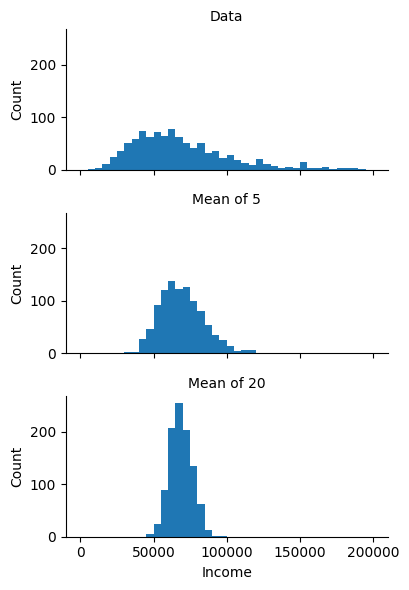

In [17]:
# Getting a random sample of 1,000 individual data points from loans_income
sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})

# Getting a 1,000 samples with each sample containing 5 individual incomes
# Then storing 1,000 records, each representing the mean of a sample of size 5
sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

# Getting a 1,000 samples with each sample containing 20 individual incomes
# Then storing 1,000 records, each representing the mean of a sample of size 20
sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])

g = sns.FacetGrid(results, col='type',
                  col_wrap=1,
                  height=2,
                  aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

**Key Concept**

This demonstrates the Central Limit Theorem:
* Regardless of the shape of the original data, the distribution of sample means becomes approximately normal as the sample size increases.
* The larger the sample size, the less variability (i.e., the narrower the histogram).

### Central Limit Theorem

Central Limit Theroem says that means drawn from multiple samples will resemble a bell-shaped normal distribution, even if the source population is not normally distributed, provided that the sample size is large enough and the departure of the data from normality is not too great.

### Standard Error

Standard error is a single metric that sums up the variability in the sampling distribution for a statistic. 

The standard error can be estimated using a statistic based on the standard deviation $s$ of the sample values, and the sample size $n$:

$ \text{Standard error} = SE = \frac{s}{\sqrt{n}} $

As sample size increases, the standard error decreases (as shown graph of income). The relationship between standard error and sample size is sometimes referred to as the square root of n rule: to reduce the standard error by a factor of 2, the sample size must be increased by a factor of 4.

#### Example: Square root of n rule

Square root of n rule example:

You start with the standard error formula:

$$
SE = \frac{s}{\sqrt{n}}
$$

You’re trying to **reduce the standard error by a factor of 2**, meaning:

$$
\text{New SE} = \frac{SE}{2}
$$

---

**Step 1: Set up the equation**

Let’s define:

* $s$: sample standard deviation (assumed constant)
* $n$: original sample size
* $n'$: new sample size
* $SE$: original standard error = $\frac{s}{\sqrt{n}}$
* $SE'$: new standard error = $\frac{s}{\sqrt{n'}}$

You want:

$$
SE' = \frac{SE}{2}
\Rightarrow \frac{s}{\sqrt{n'}} = \frac{1}{2} \cdot \frac{s}{\sqrt{n}}
$$

---

**Step 2: Cancel out common terms**

Since $s$ appears on both sides, you can cancel it:

$$
\frac{1}{\sqrt{n'}} = \frac{1}{2\sqrt{n}}
$$

---

**Step 3: Solve for $n'$**

Multiply both sides by $\sqrt{n'}$:

$$
1 = \frac{\sqrt{n'}}{2\sqrt{n}}
$$

Multiply both sides by $2\sqrt{n}$:

$$
2\sqrt{n} = \sqrt{n'}
$$

Now square both sides:

$$
(2\sqrt{n})^2 = n' \Rightarrow 4n = n'
$$

---

**✅ Final Answer:**

To reduce standard error by a factor of 2, you must **increase sample size by a factor of 4**:

$$
n' = 4n
$$

So if your original sample size was $n = 25$, then:

$$
n' = 4 \cdot 25 = 100
$$

And that’s how we got the new sample size of 100.


>In modern statistics, the bootstrap has become the standard way to estimate standard error. It can be used for virtually any statistic and does not relay on the central limit theorem or other distributional assumptions.

**Key Ideas**

* The frequency distribution of a sample statistic tells us how that metric would turn out differently from sample to sample
* This sampling distribution can be estimated via the bootstrap, or via formulas that rely on the central limit theorem.
* A key metric that sums up the variability of a sample statistic is its standard error.

## The Bootstrap

### What is bootstrap?

Key terms for the Bootstrap

* Bootstrap sample: a sample taken with replacement from an observed data set
* Resampling: the process of taking repeated samples from observed data; includes both bootstrap and permutation (shuffling) procedures.

The Bootstrap method is an easy and effective way to estimate the sampling of a statistic, or of a model parameters. You draw additional samples, with replacement, from the sample itself and recalculate teh statistic or model for each sample.
* Does not involve assumptions about the data or the sample statistic being normally distributed

**How the Bootstrap Algorithm Works**

In practice, we simply replace each observation after each draw i.e. we sample with replacement. We effectively create an infinite population in which the probability of an element being drawn remains unchanged from draw to draw. 

The algorithm for a bootstrap resamplling of the mean, for a sample size of n, is as follows:
1. Draw a sample value, record it, and then replace it.
2. Repeat $n$ times.
3. Record the mean of the $n$ resampled values.
4. Repeat steps 1-3 $R$ times.
5. The $R$ results to:
    - Calculate their standard deviation (this estimates sample mean standard error)
    - Produce a histogram or boxplot
    - Find a confidence interval

$R$, the number of iterations, is arbitrary. The more iterations you do, the more accurate the estimate of the standard error, or the confidence interval. The result is a bootstrap set of sample statistics or estimated model parameters, which you can examine to see how variable they are.

**Python Example**

The following applies the bootstrap to the incomes of people taking out loans. To implement this in Python, we use the scikit-learn resample method:

In [20]:
results = []

for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 62000.0
bias: -73.9429999999993
std. error: 213.01052493887414


Interpretation:
- The original estimate of the median is $62,000
- The estimate has a bias of about -$74 and a standard error of $213

The results will vary slightly between consecutive runs of the algorithm.

**Bootstrapping Use Case**

Can be used with multivariate data, where rows are sampled as units. A model can be run on the bootstrapped data, for example, to estimate the stability (variability) of model parameters, or to improve predictive power. With classification and regression trees (or decision trees), running multiple trees on bootstrap samples and then averaging their predictions (or, with classification, taking a majority vote) generally performs better than using a single tree. This process is called *bagging* (short for *"bootstrap aggregating"*)

Bootstrapping can also be used for sample size determination; experiment with different values for $n$ to see how the sampling distribution is affected.

### Resampling vs Bootstrapping

The term resampling is used synonymously with the term bootstrapping. Resampling can also be a permutation test, where multiple samples are combined and the sampling may be done without replacement. 

In any case, the term bootstrap always implies sampling with replacement from an observed data set.

**Key Takeaways**

* The bootstrap (sampling with replacement from a data set) is a powerful tool for assessing the variability of a sample statistic.
* The bootstrap can be applied in similar fashion in a wide variety of circumstances, without extensive study of mathematical approximations to sampling distributions.
* It also allows us to estimate sampling distributions for statistics where no mathematical approximation has been developed.
* When applied to predictive models, aggregating multiple bootstrap sample predictions (bagging) outperforms the use of a single model.

## Confidence Intervals

Frequency tables, histograms, boxplots, and standard errors help understand the potential error in a sample estimate. Confidence intervals are another.

**Key Terms for Confidence Intervals**

- Confidence level: the percentage of confidence intervals, constructed in the same way from the same population, that are expected to contain the statistic of interest.

- Interval endpoints: The top and bottom of the confidence interval.

**Bootstrap Confidence Interval Algorithm**

Given a sample of size $n$, and a sample statistic of interest, the algorithm is as follows:

1. Draw a random sample of size $n$ with replacement from the data (a resample)
2. Record the statistic of interest for the resample
3. Repeat steps 1-2 many ($R$) times.
4. For an $x$% confidence interval, trim [(100-x)/2]% of the $R$ sample results from either end of the distribution.
5. The trim points are the endpoints of an $x$% bootstrap confidence interval.

**Confidence Level**

- Level of confidence: the percentage associated with the confidence interval
- The higher the level of confidence, the wider the interval.
- Also, the smaller the sample, the wider the interval.

> Data scientists would likely use the level of confidence to communicate the potential error in an estimate, and perhaps to learn whether a larger sample is needed.

**Key Takeaways**

* Confidence intervals are the typical way to present estimates as an interval range.
* The more data you have, the less variable a sample estimate will be.
* The lower the level of confidence you can tolerate, the narrower the confidence interval will be.
* The bootstrap is an effective way to construct confidence intervals.

## Normal Distribution

**Key Terms for Normal Distribution**

- Error: the difference between a data point and a predicted or average value
- Standardize: subtract the mean and divide the standard deviation
- z-score: the result of standardizing an individual data point
- Standard Normal: a normal distribution with mean = 0 and standard deviation = 1
- QQ-Plot: a plot to visualize how close a sample distribution is to a specified distribution, e.g., the normal distribution.

What is a Normal Distribution?

- Bell-shaped
- 68% of the data lies within one standard deviation of the mean
- 95% lies within two standard deviations

Misconceptions
- Most raw data are *not* normally distributed
- The utility of the normal distribution derives from the fact that many statistics *are* normally distributed in their sampling distribution.
- Assumptions of normality are generally a last resort, used when empirical probability distributions, or bootstrap distributions, are not available.

### Standard Normal and QQ-Plots

**Standard Normal Distribution**

- where the units on the x-axis are expressed in terms of standard deviations away from the mean. 
- To compare data to a standard normal distribution, you subtract the mean and then divide by the standard deviation
- Also called *normalization* or *standardization*
- The transformed value is called a *z-score*, and the normal distribution is sometimes called the *z-distribution*
- This is unrelated to database record standardization (conversion to a common format)

**QQ-Plots**

- Used to visually determine how close a sample is to a specified distribution - in this case, the normal distribution
- It orders the z-scores from low to high and plots each value's z-score on the y-axis; the x-axis is the corresponding quantile of a normal distribution for that value's rank
- Since data is normalized, the units correspond to the number of standard deviations away from the mean
- if the points fall on the diagonal line, the sample distributions can be considered close to normal

Below shows a QQ-Plot for a sample of 100 values randomly generated from a normal distribution. In Python, use the method scipy.stats.probplot to create the QQ-Plot:

((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

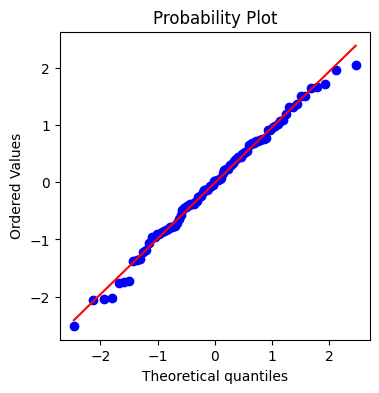

In [22]:
fig, ax = plt.subplots(figsize=(4,4))
norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

**Key Takeaways**

- The normal distribution was essential to historical development of statistics, as it permitted mathematical approximation of uncertainty and variability.
- While raw data is typically not normally distributed, errors often are, as are averages and totals in large samples.
- To convert data to z-scores, you subtract the mean of the data and divide by the standard deviation; you can then compare the data to a normal distribution.

## Long-Tailed Distributions

**Key Terms for Long-Tailed Distributions**

- Tail: the long narrow portion of a frequency distribution, where relatively extreme values occur at low frequency

- Skew: where one tail of a distribution is longer than the others